# Laplace Equation & Possion Equations

In this Lab, we will learn how to numerically solve Laplace and Possion equations, which are common equations in electromagnestism and gravitational problems. 

There should be two files under `./poisson_solver`.\
1. `mesh.py` handles the mesh grids we will used in this Lab.\
2. `solvers.py` handles all corresponding iterative solvers for Laplace/Poisson Equation. 

In [7]:
%reset -f

import numpy as np
import numba as na
import matplotlib.pyplot as plt
import time as time
from poisson_solver.mesh import Mesh2D
from poisson_solver.solvers import *

## Exercise 4: Jacobi method

1. Test your Mesh2D class to see if you could generate the grids we need for this calculation
2. Implement the Jacobi meothd in `./poisson_solver/solver.py`.
3. Write a function called `updata_boundary()` to update the boundary conditions.\
   Where to put this `update_boundary()` function is up to you.\
   You could put it either inside the `Mesh2D` class, in `solvers.py`, or here.

In [8]:
nx, ny    = 64, 64
buff_size = 1
tor       = 1e-3

boundary    = np.zeros((4, nx + 2*buff_size))
boundary[1] = np.ones(nx + 2*buff_size)

mesh = Mesh2D(nx = nx, ny = ny, buff_size=buff_size)

t1 = time.time()
u  = solve(tor, boundary, mesh)
t2 = time.time()

print("Time = ", np.round((t2-t1), 2))

Time =  6.57


### Visualize your results

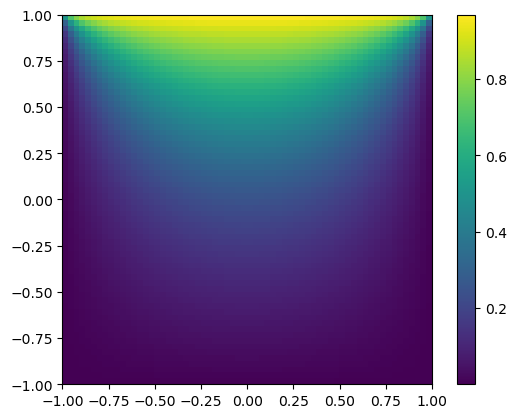

In [9]:
# prune the margins
u = np.delete(u, (0, -1), 0)
u = np.delete(u, (0, -1), 1)

plt.imshow(u, origin = 'lower', extent=[-1, 1, -1, 1])
plt.colorbar()

### Error convergence.

To see how it converge, we could make a of Error vs. Iteration times to see how it converges.

## Exercise 5: Gauss-Seidel Meothd.

1. Implement the Gauss-Seidel meothd in your solver.
2. Repeat exercise 4. for the Gauss-Seidel meothd.
3. Compare the error convergence between Jacobi and Gauss-Seidel

## Exercise 6: Successive Over-Relaxation (SOR) method.

1. Implment the SOR method in your solver.
2. Repeart exercise 5 for the SOR method.
3. Compare the error convergence with all other methods.

## Exercise 7: Extend your solver for calculating Poisson's Equation.

1. Repeat exercise 3 for solving the Poisson's equation but use iteractive methods.

# Multi-Grid Method